In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PARAM_HVR import mean_rr,mean_hr,sdnn, sdsd, rmssd, rmssd_sdsd, time_domain_analysis, poincare, stress_index, res_index, pns_index
from PARAM_HVR import sns_index, iterative_sd, iterative_mean, frequency_domian, countPairsWithDiffK,kurtose,skewness,relativeRR
from entropy import *

In [2]:
P1_data = pd.read_csv('0. interim/swell/rri/p1.csv')

In [3]:
time_sec = P1_data['Time']
time_min =P1_data['Time']/60
RR = P1_data['rri']

In [4]:
#Die Methode "find_Time_index" liefert der Index einer gegebenen Zeit(minute) zurück
#@param zeit soll genau sein d.h in der list "time_min" vorhandeln sein ZB. 1.0002604166666667 für 1min, 5.0002604999999996 für 5min usw 
#um die genau zeit abzulesen soll die fongende kommenzierte code ausführt werden 
#for t in time_min:
        #print(t)
    
def find_MinuteTime_index(zeit):
    index=0
    for times in time_min:
        index=index+1
        if(zeit==times):
            break
            
    return index-1


#Die Methode "find_Time_index" liefert der Index einer gegebenen Zeit(minute) zurück
#um die genau zeit abzulesen soll die fongende kommenzierte code ausführt werden 
#for t in time_sec:
        #print(t)

def find_SekundeTime_index(zeit):
    index=0
    for times in time_sec:
        index=index+1
        if(zeit==times):
            break
            
    return index-1

In [5]:
def rr_schneider(zeitparam):
    sume=0
    arr_list=[]
    index_rr=0
    for t in time_min:
        index_rr=find_MinuteTime_index(t)
        arr_list.append(RR[index_rr])
        index_rr=index_rr+1
        if(t==zeitparam):
            break
    return arr_list
    

In [6]:
RR_10min=rr_schneider(10.0002605)
RR_10min

[870.11719,
 885.36996,
 890.18974,
 886.73851,
 877.1782,
 863.6708,
 848.3779699999999,
 833.31187,
 820.09208,
 810.27451,
 804.99293,
 803.12756,
 802.80973,
 802.2873599999999,
 801.04602,
 799.31462,
 797.35604,
 795.98185,
 796.55235,
 800.43161,
 807.49011,
 815.0982799999999,
 820.3883400000001,
 821.36308,
 819.27105,
 816.11717,
 813.73748,
 812.55428,
 812.28499,
 812.64192,
 813.3375,
 814.16169,
 815.10455,
 816.18801,
 817.434,
 818.86447,
 820.49697,
 822.27945,
 824.10395,
 825.86094,
 827.44085,
 828.7294400000001,
 829.6005200000001,
 829.92606,
 829.57805,
 828.4180200000001,
 826.13274,
 822.2642900000001,
 816.35549,
 808.34864,
 798.86525,
 788.59333,
 778.4314400000001,
 769.83751,
 764.3611,
 763.12117,
 765.88013,
 772.1339,
 781.3784099999999,
 793.1095799999999,
 806.6714,
 820.07685,
 830.64985,
 835.76986,
 835.06217,
 830.99269,
 826.2088,
 822.3962700000001,
 818.41264,
 812.5981400000001,
 803.77282,
 793.71508,
 785.32984,
 781.11265,
 779.62999,
 777.

In [7]:
#convert List of Objects to Data Frame 
from pandas import DataFrame

def List_to_DataFrame(liste,colName):
    df_10 = DataFrame (liste,columns=[colName])
    rri_reshap = df_10[colName]
    return rri_reshap

In [8]:
RR_10=List_to_DataFrame(RR_10min,'10min rri')
RR_10

0       870.11719
1       885.36996
2       890.18974
3       886.73851
4       877.17820
          ...    
2391    765.90934
2392    762.34533
2393    758.02504
2394    749.21721
2395    732.20732
Name: 10min rri, Length: 2396, dtype: float64

In [9]:
#Die Methode "random_rr" gibt eine zufällige liste von X elements entlang der rri-liste zurück
# X ist ein Zeitindex (Interger). ZB. für ein Zeitindex X=2 wird eine liste von rri mit 2 elementen generiert

def random_rr(X):
    liste=[]
    rr=RR_10.sample(X)
    for line in rr:
        liste+=[line]
    return liste

In [10]:
#berechnet die Summe von elementen einer liste 
def somme(liste):
    sume=0
    for elt in liste:
        sume+=elt
    return sume

In [11]:
# generiert eine liste von rri-elementen für eine gegebene zeit(minute)
def rand_rr_MinuteInterval(zeit):
    idx=find_MinuteTime_index(zeit)
    random_intervals_list = random_rr(idx)
    return  random_intervals_list

# generiert eine liste von rri-elementen für eine gegebene zeit(sekunde)
def rand_rr_SekundeInterval(zeit):
    idx=find_SekundeTime_index(zeit)
    random_intervals_list = random_rr(idx)
    return  random_intervals_list

In [12]:
print('min_RR_interval_list')
rand_rr_min=rand_rr_MinuteInterval(1.0002604166666667)
rand_rr_min

min_RR_interval_list


[1110.8742,
 938.6687099999999,
 1024.1676,
 1060.1786,
 1014.4429,
 1058.2529,
 880.91701,
 1067.0511,
 914.8702300000001,
 633.5798900000001,
 795.40401,
 959.45464,
 648.6850900000001,
 831.42384,
 1079.4041,
 868.00137,
 1018.8114,
 947.4435199999999,
 992.8086800000001,
 1095.4925,
 999.1425800000001,
 774.8028099999999,
 947.3453699999999,
 1009.5923,
 1094.1055,
 975.2557699999999,
 986.67714,
 1018.1477,
 781.5686400000001,
 1066.7786,
 869.7143,
 1054.9186,
 820.3883400000001,
 990.70684,
 1077.174,
 803.1050700000001,
 842.55934,
 956.86231,
 1046.6848,
 802.80973,
 908.02132,
 1089.7345,
 1013.1296,
 850.10294,
 901.97075,
 1032.2306,
 918.29038,
 1033.37,
 898.16939,
 835.76986,
 1018.0782,
 980.96748,
 920.4233300000001,
 1021.9776,
 1020.8971,
 1148.2689,
 818.8425900000001,
 892.76571,
 819.27105,
 817.02804,
 1015.1972,
 908.56023,
 790.96296,
 975.03585,
 1003.9252,
 1092.8015,
 1002.1496,
 995.4785699999999,
 1036.5213,
 961.0495199999999,
 796.55235,
 1094.4605,
 105

In [14]:
#Methode to calculate the sample entropy(Package entropy)
#für eine eingegebene zeitintervall @param "minute/sekunde" wird zufällig entlang der gesamgten RR-länge diese zeitintervall genommen und 
#es wird der sample entropie davon berechnet. Der zufallexperiment wird 50 mal wiederholt und  es wird jedesmal die entropieberechnung 
#in einer liste hinzugefügt und die liste wird zurückgegeben

#print('interval_entropy_list in minute')
def rand_entrop(minute):
    rand_entropy_list=[]
    for n in range(1,101):
        rand_rr=rand_rr_MinuteInterval(minute)
        samp_entrop=sample_entropy(rand_rr, order=2, metric='chebyshev')            # Sample entropy
        rand_entropy_list.append(samp_entrop)
    return rand_entropy_list


#print('interval_entropy_list in seconde')
def rand_entropy(sekunde):
    rand_entropy_list=[]
    for n in range(1,101):
        rand_rr=rand_rr_SekundeInterval(sekunde)
        samp_entrop=sample_entropy(rand_rr, order=2, metric='chebyshev')            # Sample entropy
        rand_entropy_list.append(samp_entrop)
    return rand_entropy_list



In [15]:
samp_entrop=sample_entropy(RR_10, order=2, metric='chebyshev')
print('sample_entropy for 10min RR: '+ str(samp_entrop)+'\n')

RR_1min_inter=rand_entrop(1.0002604166666667)
print('Sample entropy 1min RR intervals: '+'\n' +str(RR_1min_inter)+'\n')
print('mean of entropy 1min RR intervals: '+ str(mean_rr(RR_1min_inter))+'\n')

RR_2min_inter=rand_entrop(2.0002605)
print('Sample entropy 2min RR intervals: '+'\n' + str(RR_2min_inter)+'\n')
print('mean of entropy 2min RR intervals: '+ str(mean_rr(RR_2min_inter))+'\n')

RR_3min_inter=rand_entrop(3.0002605000000004)
print('Sample entropy 3min RR intervals: '+'\n' + str(RR_3min_inter)+'\n')
print('mean of entropy 3min RR intervals: '+ str(mean_rr(RR_3min_inter))+'\n')

RR_4min_inter=rand_entrop(4.0002604999999996)
print('Sample entropy 4min RR intervals: '+'\n' + str(RR_4min_inter)+'\n')
print('mean of entropy 4min RR intervals: '+ str(mean_rr(RR_4min_inter))+'\n')

RR_5min_inter=rand_entrop(5.0002604999999996)
print('Sample entropy 5min RR intervals: '+'\n' + str(RR_5min_inter)+'\n')
print('mean of entropy 5min RR intervals: '+ str(mean_rr(RR_5min_inter))+'\n')

#RR_10min_inter=rand_entrop(10.0002605)
#print('Sample entropy 10min RR intervals: '+'\n' + str(RR_10min_inter)+'\n')
#print('mean of entropy 10min RR intervals: '+ str(mean_rr(RR_10min_inter)))

#RR_1min_inter     

sample_entropy for 10min RR: 0.37108077987190746

Sample entropy 1min RR intervals: 
[2.1992427414924567, 2.138912095278164, 2.1186622548331173, 2.2136376069775494, 2.2078516699105055, 1.9908881443383908, 2.221917189926591, 2.265313698196814, 1.9643722118950486, 2.131313372386676, 2.1355310083308794, 2.3074512826452187, 2.0631810208080554, 2.0701391490175225, 1.9636097261547143, 2.0405597541356286, 2.1340456757146877, 2.0268531899129227, 1.8604254899194834, 2.0281482472922856, 2.3332220624559357, 2.1026086009613705, 2.114532861491106, 2.0509790770160743, 2.0701391490175225, 2.0375944317443353, 2.2126603854660587, 2.0738288047748785, 1.877360834905419, 1.9771626925594177, 1.9953584244692946, 1.9815160045095277, 2.1893967487159727, 1.9498705502714102, 1.9724694221276682, 2.208975593871738, 2.2512917986064953, 2.1578106087953426, 2.087065466790495, 1.9287054236056824, 1.7723413833709534, 2.0050507240992532, 1.8905768862969454, 2.3279029009783354, 1.757447324239276, 1.88540782895737, 1.760

Sample entropy 5min RR intervals: 
[2.0419448066635986, 2.0329968221468993, 2.026686936409456, 2.0180368369584363, 2.055201513573542, 2.035906238103225, 2.028181431848196, 1.9999992652431229, 1.9787289876246241, 2.0435338058891688, 2.068751654099825, 2.051977810125269, 1.9839937510170729, 2.0313682000623583, 1.9710692142819082, 2.0425069691362667, 2.0803796680545528, 2.045691124049545, 1.9840619150196896, 1.980295934204147, 2.093638531426211, 1.9665310843357724, 2.0355869293531965, 1.9885403704825904, 1.999644624839539, 2.0652544820898475, 2.012870279751927, 2.0220921241147343, 2.0071650826902965, 2.032326452823119, 1.920942913365231, 2.006237171674096, 2.0192836554376004, 1.9789972370410165, 1.9871915106276195, 2.0202701179774345, 2.030376742029255, 2.0583881324820035, 2.0446759484764083, 2.0221532251739163, 2.099924035590701, 2.0086888809133923, 1.988469763474109, 2.0101636751783682, 2.1147144606538277, 1.9884906365968336, 2.039158988916243, 2.1269697038740416, 1.9781567415432, 1.981

In [16]:
for t_sec in time_sec:
    print(t_sec)

1.265625
1.515625
1.765625
2.015625
2.265625
2.515625
2.765625
3.015625
3.265625
3.515625
3.765625
4.015625
4.265625
4.515625
4.765625
5.015625
5.265625
5.515625
5.765625
6.015625
6.265625
6.515625
6.765625
7.015625
7.265625
7.515625
7.765625
8.015625
8.265625
8.515625
8.765625
9.015625
9.265625
9.515625
9.765625
10.015625
10.265625
10.515625
10.765625
11.015625
11.265625
11.515625
11.765625
12.015625
12.265625
12.515625
12.765625
13.015625
13.265625
13.515625
13.765625
14.015625
14.265625
14.515625
14.765625
15.015625
15.265625
15.515625
15.765625
16.015625
16.265625
16.515625
16.765625
17.015625
17.265625
17.515625
17.765625
18.015625
18.265625
18.515625
18.765625
19.015625
19.265625
19.515625
19.765625
20.015625
20.265625
20.515625
20.765625
21.015625
21.265625
21.515625
21.765625
22.015625
22.265625
22.515625
22.765625
23.015625
23.265625
23.515625
23.765625
24.015625
24.265625
24.515625
24.765625
25.015625
25.265625
25.515625
25.765625
26.015625
26.265625
26.515625
26.765625
27.01

514.01563
514.26563
514.51563
514.76563
515.01563
515.26563
515.51563
515.76563
516.01563
516.26563
516.51563
516.76563
517.01563
517.26563
517.51563
517.76563
518.01563
518.26563
518.51563
518.76563
519.01563
519.26563
519.51563
519.76563
520.01563
520.26563
520.51563
520.76563
521.01563
521.26563
521.51563
521.76563
522.01563
522.26563
522.51563
522.76563
523.01563
523.26563
523.51563
523.76563
524.01563
524.26563
524.51563
524.76563
525.01563
525.26563
525.51563
525.76563
526.01563
526.26563
526.51563
526.76563
527.01563
527.26563
527.51563
527.76563
528.01563
528.26563
528.51563
528.76563
529.01563
529.26563
529.51563
529.76563
530.01563
530.26563
530.51563
530.76563
531.01563
531.26563
531.51563
531.76563
532.01563
532.26563
532.51563
532.76563
533.01563
533.26563
533.51563
533.76563
534.01563
534.26563
534.51563
534.76563
535.01563
535.26563
535.51563
535.76563
536.01563
536.26563
536.51563
536.76563
537.01563
537.26563
537.51563
537.76563
538.01563
538.26563
538.51563
538.76563


994.5156300000001
994.7656300000001
995.0156300000001
995.2656300000001
995.5156300000001
995.7656300000001
996.0156300000001
996.2656300000001
996.5156300000001
996.7656300000001
997.0156300000001
997.2656300000001
997.5156300000001
997.7656300000001
998.0156300000001
998.2656300000001
998.5156300000001
998.7656300000001
999.0156300000001
999.2656300000001
999.5156300000001
999.7656300000001
1000.0156
1000.2656
1000.5156
1000.7656
1001.0156
1001.2656
1001.5156
1001.7656
1002.0156
1002.2656
1002.5156
1002.7656
1003.0156
1003.2656
1003.5156
1003.7656
1004.0156
1004.2656
1004.5156
1004.7656
1005.0156
1005.2656
1005.5156
1005.7656
1006.0156
1006.2656
1006.5156
1006.7656
1007.0156
1007.2656
1007.5156
1007.7656
1008.0156
1008.2656
1008.5156
1008.7656
1009.0156
1009.2656
1009.5156
1009.7656
1010.0156
1010.2656
1010.5156
1010.7656
1011.0156
1011.2656
1011.5156
1011.7656
1012.0156
1012.2656
1012.5156
1012.7656
1013.0156
1013.2656
1013.5156
1013.7656
1014.0156
1014.2656
1014.5156
1014.7656
1015

1596.2656
1596.5156
1596.7656
1597.0156
1597.2656
1597.5156
1597.7656
1598.0156
1598.2656
1598.5156
1598.7656
1599.0156
1599.2656
1599.5156
1599.7656
1600.0156
1600.2656
1600.5156
1600.7656
1601.0156
1601.2656
1601.5156
1601.7656
1602.0156
1602.2656
1602.5156
1602.7656
1603.0156
1603.2656
1603.5156
1603.7656
1604.0156
1604.2656
1604.5156
1604.7656
1605.0156
1605.2656
1605.5156
1605.7656
1606.0156
1606.2656
1606.5156
1606.7656
1607.0156
1607.2656
1607.5156
1607.7656
1608.0156
1608.2656
1608.5156
1608.7656
1609.0156
1609.2656
1609.5156
1609.7656
1610.0156
1610.2656
1610.5156
1610.7656
1611.0156
1611.2656
1611.5156
1611.7656
1612.0156
1612.2656
1612.5156
1612.7656
1613.0156
1613.2656
1613.5156
1613.7656
1614.0156
1614.2656
1614.5156
1614.7656
1615.0156
1615.2656
1615.5156
1615.7656
1616.0156
1616.2656
1616.5156
1616.7656
1617.0156
1617.2656
1617.5156
1617.7656
1618.0156
1618.2656
1618.5156
1618.7656
1619.0156
1619.2656
1619.5156
1619.7656
1620.0156
1620.2656
1620.5156
1620.7656
1621.0156


2114.0156
2114.2656
2114.5156
2114.7656
2115.0156
2115.2656
2115.5156
2115.7656
2116.0156
2116.2656
2116.5156
2116.7656
2117.0156
2117.2656
2117.5156
2117.7656
2118.0156
2118.2656
2118.5156
2118.7656
2119.0156
2119.2656
2119.5156
2119.7656
2120.0156
2120.2656
2120.5156
2120.7656
2121.0156
2121.2656
2121.5156
2121.7656
2122.0156
2122.2656
2122.5156
2122.7656
2123.0156
2123.2656
2123.5156
2123.7656
2124.0156
2124.2656
2124.5156
2124.7656
2125.0156
2125.2656
2125.5156
2125.7656
2126.0156
2126.2656
2126.5156
2126.7656
2127.0156
2127.2656
2127.5156
2127.7656
2128.0156
2128.2656
2128.5156
2128.7656
2129.0156
2129.2656
2129.5156
2129.7656
2130.0156
2130.2656
2130.5156
2130.7656
2131.0156
2131.2656
2131.5156
2131.7656
2132.0156
2132.2656
2132.5156
2132.7656
2133.0156
2133.2656
2133.5156
2133.7656
2134.0156
2134.2656
2134.5156
2134.7656
2135.0156
2135.2656
2135.5156
2135.7656
2136.0156
2136.2656
2136.5156
2136.7656
2137.0156
2137.2656
2137.5156
2137.7656
2138.0156
2138.2656
2138.5156
2138.7656


2634.7656
2635.0156
2635.2656
2635.5156
2635.7656
2636.0156
2636.2656
2636.5156
2636.7656
2637.0156
2637.2656
2637.5156
2637.7656
2638.0156
2638.2656
2638.5156
2638.7656
2639.0156
2639.2656
2639.5156
2639.7656
2640.0156
2640.2656
2640.5156
2640.7656
2641.0156
2641.2656
2641.5156
2641.7656
2642.0156
2642.2656
2642.5156
2642.7656
2643.0156
2643.2656
2643.5156
2643.7656
2644.0156
2644.2656
2644.5156
2644.7656
2645.0156
2645.2656
2645.5156
2645.7656
2646.0156
2646.2656
2646.5156
2646.7656
2647.0156
2647.2656
2647.5156
2647.7656
2648.0156
2648.2656
2648.5156
2648.7656
2649.0156
2649.2656
2649.5156
2649.7656
2650.0156
2650.2656
2650.5156
2650.7656
2651.0156
2651.2656
2651.5156
2651.7656
2652.0156
2652.2656
2652.5156
2652.7656
2653.0156
2653.2656
2653.5156
2653.7656
2654.0156
2654.2656
2654.5156
2654.7656
2655.0156
2655.2656
2655.5156
2655.7656
2656.0156
2656.2656
2656.5156
2656.7656
2657.0156
2657.2656
2657.5156
2657.7656
2658.0156
2658.2656
2658.5156
2658.7656
2659.0156
2659.2656
2659.5156


3174.2656
3174.5156
3174.7656
3175.0156
3175.2656
3175.5156
3175.7656
3176.0156
3176.2656
3176.5156
3176.7656
3177.0156
3177.2656
3177.5156
3177.7656
3178.0156
3178.2656
3178.5156
3178.7656
3179.0156
3179.2656
3179.5156
3179.7656
3180.0156
3180.2656
3180.5156
3180.7656
3181.0156
3181.2656
3181.5156
3181.7656
3182.0156
3182.2656
3182.5156
3182.7656
3183.0156
3183.2656
3183.5156
3183.7656
3184.0156
3184.2656
3184.5156
3184.7656
3185.0156
3185.2656
3185.5156
3185.7656
3186.0156
3186.2656
3186.5156
3186.7656
3187.0156
3187.2656
3187.5156
3187.7656
3188.0156
3188.2656
3188.5156
3188.7656
3189.0156
3189.2656
3189.5156
3189.7656
3190.0156
3190.2656
3190.5156
3190.7656
3191.0156
3191.2656
3191.5156
3191.7656
3192.0156
3192.2656
3192.5156
3192.7656
3193.0156
3193.2656
3193.5156
3193.7656
3194.0156
3194.2656
3194.5156
3194.7656
3195.0156
3195.2656
3195.5156
3195.7656
3196.0156
3196.2656
3196.5156
3196.7656
3197.0156
3197.2656
3197.5156
3197.7656
3198.0156
3198.2656
3198.5156
3198.7656
3199.0156


3702.5156
3702.7656
3703.0156
3703.2656
3703.5156
3703.7656
3704.0156
3704.2656
3704.5156
3704.7656
3705.0156
3705.2656
3705.5156
3705.7656
3706.0156
3706.2656
3706.5156
3706.7656
3707.0156
3707.2656
3707.5156
3707.7656
3708.0156
3708.2656
3708.5156
3708.7656
3709.0156
3709.2656
3709.5156
3709.7656
3710.0156
3710.2656
3710.5156
3710.7656
3711.0156
3711.2656
3711.5156
3711.7656
3712.0156
3712.2656
3712.5156
3712.7656
3713.0156
3713.2656
3713.5156
3713.7656
3714.0156
3714.2656
3714.5156
3714.7656
3715.0156
3715.2656
3715.5156
3715.7656
3716.0156
3716.2656
3716.5156
3716.7656
3717.0156
3717.2656
3717.5156
3717.7656
3718.0156
3718.2656
3718.5156
3718.7656
3719.0156
3719.2656
3719.5156
3719.7656
3720.0156
3720.2656
3720.5156
3720.7656
3721.0156
3721.2656
3721.5156
3721.7656
3722.0156
3722.2656
3722.5156
3722.7656
3723.0156
3723.2656
3723.5156
3723.7656
3724.0156
3724.2656
3724.5156
3724.7656
3725.0156
3725.2656
3725.5156
3725.7656
3726.0156
3726.2656
3726.5156
3726.7656
3727.0156
3727.2656


4243.0156
4243.2656
4243.5156
4243.7656
4244.0156
4244.2656
4244.5156
4244.7656
4245.0156
4245.2656
4245.5156
4245.7656
4246.0156
4246.2656
4246.5156
4246.7656
4247.0156
4247.2656
4247.5156
4247.7656
4248.0156
4248.2656
4248.5156
4248.7656
4249.0156
4249.2656
4249.5156
4249.7656
4250.0156
4250.2656
4250.5156
4250.7656
4251.0156
4251.2656
4251.5156
4251.7656
4252.0156
4252.2656
4252.5156
4252.7656
4253.0156
4253.2656
4253.5156
4253.7656
4254.0156
4254.2656
4254.5156
4254.7656
4255.0156
4255.2656
4255.5156
4255.7656
4256.0156
4256.2656
4256.5156
4256.7656
4257.0156
4257.2656
4257.5156
4257.7656
4258.0156
4258.2656
4258.5156
4258.7656
4259.0156
4259.2656
4259.5156
4259.7656
4260.0156
4260.2656
4260.5156
4260.7656
4261.0156
4261.2656
4261.5156
4261.7656
4262.0156
4262.2656
4262.5156
4262.7656
4263.0156
4263.2656
4263.5156
4263.7656
4264.0156
4264.2656
4264.5156
4264.7656
4265.0156
4265.2656
4265.5156
4265.7656
4266.0156
4266.2656
4266.5156
4266.7656
4267.0156
4267.2656
4267.5156
4267.7656


4879.2656
4879.5156
4879.7656
4880.0156
4880.2656
4880.5156
4880.7656
4881.0156
4881.2656
4881.5156
4881.7656
4882.0156
4882.2656
4882.5156
4882.7656
4883.0156
4883.2656
4883.5156
4883.7656
4884.0156
4884.2656
4884.5156
4884.7656
4885.0156
4885.2656
4885.5156
4885.7656
4886.0156
4886.2656
4886.5156
4886.7656
4887.0156
4887.2656
4887.5156
4887.7656
4888.0156
4888.2656
4888.5156
4888.7656
4889.0156
4889.2656
4889.5156
4889.7656
4890.0156
4890.2656
4890.5156
4890.7656
4891.0156
4891.2656
4891.5156
4891.7656
4892.0156
4892.2656
4892.5156
4892.7656
4893.0156
4893.2656
4893.5156
4893.7656
4894.0156
4894.2656
4894.5156
4894.7656
4895.0156
4895.2656
4895.5156
4895.7656
4896.0156
4896.2656
4896.5156
4896.7656
4897.0156
4897.2656
4897.5156
4897.7656
4898.0156
4898.2656
4898.5156
4898.7656
4899.0156
4899.2656
4899.5156
4899.7656
4900.0156
4900.2656
4900.5156
4900.7656
4901.0156
4901.2656
4901.5156
4901.7656
4902.0156
4902.2656
4902.5156
4902.7656
4903.0156
4903.2656
4903.5156
4903.7656
4904.0156


5342.2656
5342.5156
5342.7656
5343.0156
5343.2656
5343.5156
5343.7656
5344.0156
5344.2656
5344.5156
5344.7656
5345.0156
5345.2656
5345.5156
5345.7656
5346.0156
5346.2656
5346.5156
5346.7656
5347.0156
5347.2656
5347.5156
5347.7656
5348.0156
5348.2656
5348.5156
5348.7656
5349.0156
5349.2656
5349.5156
5349.7656
5350.0156
5350.2656
5350.5156
5350.7656
5351.0156
5351.2656
5351.5156
5351.7656
5352.0156
5352.2656
5352.5156
5352.7656
5353.0156
5353.2656
5353.5156
5353.7656
5354.0156
5354.2656
5354.5156
5354.7656
5355.0156
5355.2656
5355.5156
5355.7656
5356.0156
5356.2656
5356.5156
5356.7656
5357.0156
5357.2656
5357.5156
5357.7656
5358.0156
5358.2656
5358.5156
5358.7656
5359.0156
5359.2656
5359.5156
5359.7656
5360.0156
5360.2656
5360.5156
5360.7656
5361.0156
5361.2656
5361.5156
5361.7656
5362.0156
5362.2656
5362.5156
5362.7656
5363.0156
5363.2656
5363.5156
5363.7656
5364.0156
5364.2656
5364.5156
5364.7656
5365.0156
5365.2656
5365.5156
5365.7656
5366.0156
5366.2656
5366.5156
5366.7656
5367.0156


5862.5156
5862.7656
5863.0156
5863.2656
5863.5156
5863.7656
5864.0156
5864.2656
5864.5156
5864.7656
5865.0156
5865.2656
5865.5156
5865.7656
5866.0156
5866.2656
5866.5156
5866.7656
5867.0156
5867.2656
5867.5156
5867.7656
5868.0156
5868.2656
5868.5156
5868.7656
5869.0156
5869.2656
5869.5156
5869.7656
5870.0156
5870.2656
5870.5156
5870.7656
5871.0156
5871.2656
5871.5156
5871.7656
5872.0156
5872.2656
5872.5156
5872.7656
5873.0156
5873.2656
5873.5156
5873.7656
5874.0156
5874.2656
5874.5156
5874.7656
5875.0156
5875.2656
5875.5156
5875.7656
5876.0156
5876.2656
5876.5156
5876.7656
5877.0156
5877.2656
5877.5156
5877.7656
5878.0156
5878.2656
5878.5156
5878.7656
5879.0156
5879.2656
5879.5156
5879.7656
5880.0156
5880.2656
5880.5156
5880.7656
5881.0156
5881.2656
5881.5156
5881.7656
5882.0156
5882.2656
5882.5156
5882.7656
5883.0156
5883.2656
5883.5156
5883.7656
5884.0156
5884.2656
5884.5156
5884.7656
5885.0156
5885.2656
5885.5156
5885.7656
5886.0156
5886.2656
5886.5156
5886.7656
5887.0156
5887.2656


6435.2656
6435.5156
6435.7656
6436.0156
6436.2656
6436.5156
6436.7656
6437.0156
6437.2656
6437.5156
6437.7656
6438.0156
6438.2656
6438.5156
6438.7656
6439.0156
6439.2656
6439.5156
6439.7656
6440.0156
6440.2656
6440.5156
6440.7656
6441.0156
6441.2656
6441.5156
6441.7656
6442.0156
6442.2656
6442.5156
6442.7656
6443.0156
6443.2656
6443.5156
6443.7656
6444.0156
6444.2656
6444.5156
6444.7656
6445.0156
6445.2656
6445.5156
6445.7656
6446.0156
6446.2656
6446.5156
6446.7656
6447.0156
6447.2656
6447.5156
6447.7656
6448.0156
6448.2656
6448.5156
6448.7656
6449.0156
6449.2656
6449.5156
6449.7656
6450.0156
6450.2656
6450.5156
6450.7656
6451.0156
6451.2656
6451.5156
6451.7656
6452.0156
6452.2656
6452.5156
6452.7656
6453.0156
6453.2656
6453.5156
6453.7656
6454.0156
6454.2656
6454.5156
6454.7656
6455.0156
6455.2656
6455.5156
6455.7656
6456.0156
6456.2656
6456.5156
6456.7656
6457.0156
6457.2656
6457.5156
6457.7656
6458.0156
6458.2656
6458.5156
6458.7656
6459.0156
6459.2656
6459.5156
6459.7656
6460.0156


6961.7656
6962.0156
6962.2656
6962.5156
6962.7656
6963.0156
6963.2656
6963.5156
6963.7656
6964.0156
6964.2656
6964.5156
6964.7656
6965.0156
6965.2656
6965.5156
6965.7656
6966.0156
6966.2656
6966.5156
6966.7656
6967.0156
6967.2656
6967.5156
6967.7656
6968.0156
6968.2656
6968.5156
6968.7656
6969.0156
6969.2656
6969.5156
6969.7656
6970.0156
6970.2656
6970.5156
6970.7656
6971.0156
6971.2656
6971.5156
6971.7656
6972.0156
6972.2656
6972.5156
6972.7656
6973.0156
6973.2656
6973.5156
6973.7656
6974.0156
6974.2656
6974.5156
6974.7656
6975.0156
6975.2656
6975.5156
6975.7656
6976.0156
6976.2656
6976.5156
6976.7656
6977.0156
6977.2656
6977.5156
6977.7656
6978.0156
6978.2656
6978.5156
6978.7656
6979.0156
6979.2656
6979.5156
6979.7656
6980.0156
6980.2656
6980.5156
6980.7656
6981.0156
6981.2656
6981.5156
6981.7656
6982.0156
6982.2656
6982.5156
6982.7656
6983.0156
6983.2656
6983.5156
6983.7656
6984.0156
6984.2656
6984.5156
6984.7656
6985.0156
6985.2656
6985.5156
6985.7656
6986.0156
6986.2656
6986.5156


7482.2656
7482.5156
7482.7656
7483.0156
7483.2656
7483.5156
7483.7656
7484.0156
7484.2656
7484.5156
7484.7656
7485.0156
7485.2656
7485.5156
7485.7656
7486.0156
7486.2656
7486.5156
7486.7656
7487.0156
7487.2656
7487.5156
7487.7656
7488.0156
7488.2656
7488.5156
7488.7656
7489.0156
7489.2656
7489.5156
7489.7656
7490.0156
7490.2656
7490.5156
7490.7656
7491.0156
7491.2656
7491.5156
7491.7656
7492.0156
7492.2656
7492.5156
7492.7656
7493.0156
7493.2656
7493.5156
7493.7656
7494.0156
7494.2656
7494.5156
7494.7656
7495.0156
7495.2656
7495.5156
7495.7656
7496.0156
7496.2656
7496.5156
7496.7656
7497.0156
7497.2656
7497.5156
7497.7656
7498.0156
7498.2656
7498.5156
7498.7656
7499.0156
7499.2656
7499.5156
7499.7656
7500.0156
7500.2656
7500.5156
7500.7656
7501.0156
7501.2656
7501.5156
7501.7656
7502.0156
7502.2656
7502.5156
7502.7656
7503.0156
7503.2656
7503.5156
7503.7656
7504.0156
7504.2656
7504.5156
7504.7656
7505.0156
7505.2656
7505.5156
7505.7656
7506.0156
7506.2656
7506.5156
7506.7656
7507.0156


8094.7656
8095.0156
8095.2656
8095.5156
8095.7656
8096.0156
8096.2656
8096.5156
8096.7656
8097.0156
8097.2656
8097.5156
8097.7656
8098.0156
8098.2656
8098.5156
8098.7656
8099.0156
8099.2656
8099.5156
8099.7656
8100.0156
8100.2656
8100.5156
8100.7656
8101.0156
8101.2656
8101.5156
8101.7656
8102.0156
8102.2656
8102.5156
8102.7656
8103.0156
8103.2656
8103.5156
8103.7656
8104.0156
8104.2656
8104.5156
8104.7656
8105.0156
8105.2656
8105.5156
8105.7656
8106.0156
8106.2656
8106.5156
8106.7656
8107.0156
8107.2656
8107.5156
8107.7656
8108.0156
8108.2656
8108.5156
8108.7656
8109.0156
8109.2656
8109.5156
8109.7656
8110.0156
8110.2656
8110.5156
8110.7656
8111.0156
8111.2656
8111.5156
8111.7656
8112.0156
8112.2656
8112.5156
8112.7656
8113.0156
8113.2656
8113.5156
8113.7656
8114.0156
8114.2656
8114.5156
8114.7656
8115.0156
8115.2656
8115.5156
8115.7656
8116.0156
8116.2656
8116.5156
8116.7656
8117.0156
8117.2656
8117.5156
8117.7656
8118.0156
8118.2656
8118.5156
8118.7656
8119.0156
8119.2656
8119.5156


8519.0156
8519.2656
8519.5156
8519.7656
8520.0156
8520.2656
8520.5156
8520.7656
8521.0156
8521.2656
8521.5156
8521.7656
8522.0156
8522.2656
8522.5156
8522.7656
8523.0156
8523.2656
8523.5156
8523.7656
8524.0156
8524.2656
8524.5156
8524.7656
8525.0156
8525.2656
8525.5156
8525.7656
8526.0156
8526.2656
8526.5156
8526.7656
8527.0156
8527.2656
8527.5156
8527.7656
8528.0156
8528.2656
8528.5156
8528.7656
8529.0156
8529.2656
8529.5156
8529.7656
8530.0156
8530.2656
8530.5156
8530.7656
8531.0156
8531.2656
8531.5156
8531.7656
8532.0156
8532.2656
8532.5156
8532.7656
8533.0156
8533.2656
8533.5156
8533.7656
8534.0156
8534.2656
8534.5156
8534.7656
8535.0156
8535.2656
8535.5156
8535.7656
8536.0156
8536.2656
8536.5156
8536.7656
8537.0156
8537.2656
8537.5156
8537.7656
8538.0156
8538.2656
8538.5156
8538.7656
8539.0156
8539.2656
8539.5156
8539.7656
8540.0156
8540.2656
8540.5156
8540.7656
8541.0156
8541.2656
8541.5156
8541.7656
8542.0156
8542.2656
8542.5156
8542.7656
8543.0156
8543.2656
8543.5156
8543.7656


8887.5156
8887.7656
8888.0156
8888.2656
8888.5156
8888.7656
8889.0156
8889.2656
8889.5156
8889.7656
8890.0156
8890.2656
8890.5156
8890.7656
8891.0156
8891.2656
8891.5156
8891.7656
8892.0156
8892.2656
8892.5156
8892.7656
8893.0156
8893.2656
8893.5156
8893.7656
8894.0156
8894.2656
8894.5156
8894.7656
8895.0156
8895.2656
8895.5156
8895.7656
8896.0156
8896.2656
8896.5156
8896.7656
8897.0156
8897.2656
8897.5156
8897.7656
8898.0156
8898.2656
8898.5156
8898.7656
8899.0156
8899.2656
8899.5156
8899.7656
8900.0156
8900.2656
8900.5156
8900.7656
8901.0156
8901.2656
8901.5156
8901.7656
8902.0156
8902.2656
8902.5156
8902.7656
8903.0156
8903.2656
8903.5156
8903.7656
8904.0156
8904.2656
8904.5156
8904.7656
8905.0156
8905.2656
8905.5156
8905.7656
8906.0156
8906.2656
8906.5156
8906.7656
8907.0156
8907.2656
8907.5156
8907.7656
8908.0156
8908.2656
8908.5156
8908.7656
8909.0156
8909.2656
8909.5156
8909.7656
8910.0156
8910.2656
8910.5156
8910.7656
8911.0156
8911.2656
8911.5156
8911.7656
8912.0156
8912.2656


In [18]:
samp_entrop=sample_entropy(RR_10, order=2, metric='chebyshev')
print('sample_entropy for 10min_RR: '+ str(samp_entrop)+'\n')

RR_45s_inter=rand_entropy(45.015625)
print('Sample entropy 45s RR intervals: '+'\n' +str(RR_45s_inter)+'\n')
print('mean of entropy 45s RR intervals: '+ str(mean_rr(RR_45s_inter))+'\n')

RR_30s_inter=rand_entropy(30.015625)
print('Sample entropy 30s RR intervals: '+'\n' + str(RR_30s_inter)+'\n')
print('mean of entropy 30s RR intervals: '+ str(mean_rr(RR_30s_inter))+'\n')

RR_25s_inter=rand_entropy(25.015625)
print('Sample entropy 25s RR intervals: '+'\n' + str(RR_25s_inter)+'\n')
print('mean of entropy 25s RR intervals: '+ str(mean_rr(RR_25s_inter))+'\n')

RR_20s_inter=rand_entropy(20.015625)
print('Sample entropy 20s RR intervals: '+'\n' + str(RR_20s_inter)+'\n')
print('mean of entropy 20s RR intervals: '+ str(mean_rr(RR_20s_inter))+'\n')

RR_15s_inter=rand_entropy(15.015625)
print('Sample entropy 15s RR intervals: '+'\n' + str(RR_15s_inter)+'\n')
print('mean of entropy 15s RR intervals: '+ str(mean_rr(RR_15s_inter))+'\n')

RR_10s_inter=rand_entropy(10.015625)
print('Sample entropy 10s RR intervals: '+'\n' + str(RR_10s_inter)+'\n')
print('mean of entropy 10s RR intervals: '+ str(mean_rr(RR_10s_inter)))


sample_entropy for 10min_RR: 0.37108077987190746

Sample entropy 45s RR intervals: 
[1.8741304666611824, 1.928757069829064, 2.2472349979108808, 2.0149030205422647, 2.5512817187328727, 2.2553322081435, 2.3283375890964604, 2.106252799130493, 2.1026086009613705, 1.9621048349752939, 2.3685430607858433, 2.2424811689243405, 2.3234191798968875, 2.087223682121891, 2.258133330423212, 2.249475267680097, 1.8152899666382492, 2.1700384370320625, 2.0794415416798357, 1.9223796516451193, 1.9640594675609908, 1.8899514954072687, 2.0794415416798357, 1.8684520900163095, 1.9459101490553135, 2.3978952727983707, 2.0024805005437076, 1.9898293829901488, 2.216871574720016, 1.957744606702316, 2.1799827709017134, 2.159484249353372, 2.035638919021443, 2.0520425674917218, 2.177183826452773, 1.9725783961374748, 2.4600914806682765, 2.0959708436310467, 1.9459101490553135, 2.2881963555419462, 2.0325246218920845, 2.094945728215801, 2.1090003439213802, 2.066426173567766, 2.1510351948668447, 2.182625777915067, 2.155630680

C:\Users\kamde\AppData\Local\Continuum\anaconda3\envs\ReseauxNeuronal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kamde\AppData\Local\Continuum\anaconda3\envs\ReseauxNeuronal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kamde\AppData\Local\Continuum\anaconda3\envs\ReseauxNeuronal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a futur

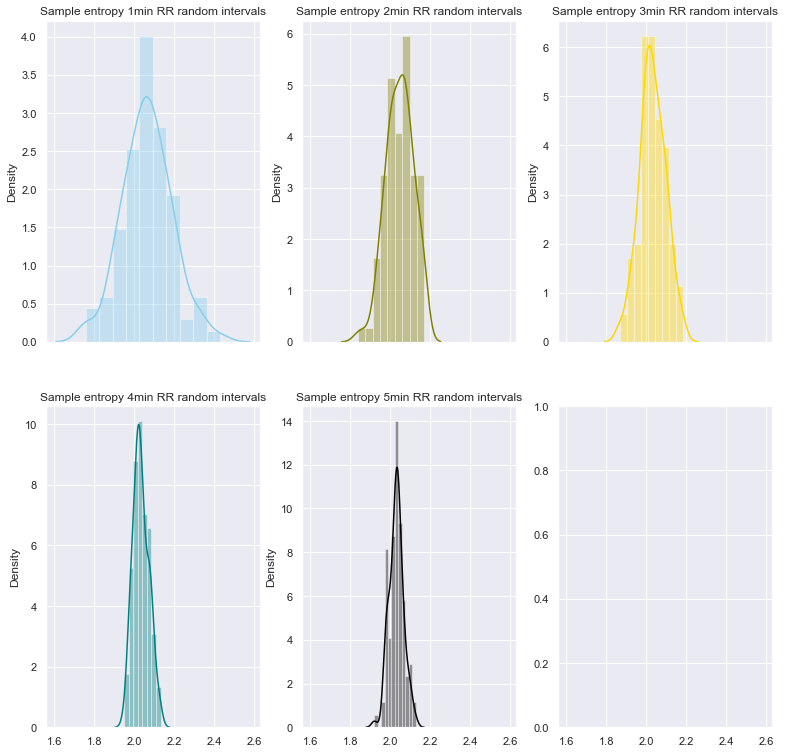

In [20]:
# Histograms der sample entropies generiert aus den random Zeitintervals(Minutenweise)
import seaborn as sns

sns.set_theme()
f, axes = plt.subplots(2, 3, figsize=(13, 13), sharex=True)
sns.distplot(RR_1min_inter ,bins='auto', color="skyblue", ax=axes[0, 0]).set_title('Sample entropy 1min RR random intervals')
sns.distplot(RR_2min_inter ,bins='auto', color="olive", ax=axes[0, 1]).set_title('Sample entropy 2min RR random intervals')
sns.distplot(RR_3min_inter ,bins='auto', color="gold", ax=axes[0, 2]).set_title('Sample entropy 3min RR random intervals')
sns.distplot(RR_4min_inter ,bins='auto', color="teal", ax=axes[1, 0]).set_title('Sample entropy 4min RR random intervals')
sns.distplot(RR_5min_inter ,bins='auto', color="black", ax=axes[1, 1]).set_title('Sample entropy 5min RR random intervals')
#sns.distplot(RR_10min_inter ,bins='auto', color="red", ax=axes[1, 2]).set_title('Sample entropy 10min RR random intervals')
plt.show()


C:\Users\kamde\AppData\Local\Continuum\anaconda3\envs\ReseauxNeuronal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kamde\AppData\Local\Continuum\anaconda3\envs\ReseauxNeuronal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kamde\AppData\Local\Continuum\anaconda3\envs\ReseauxNeuronal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a futur

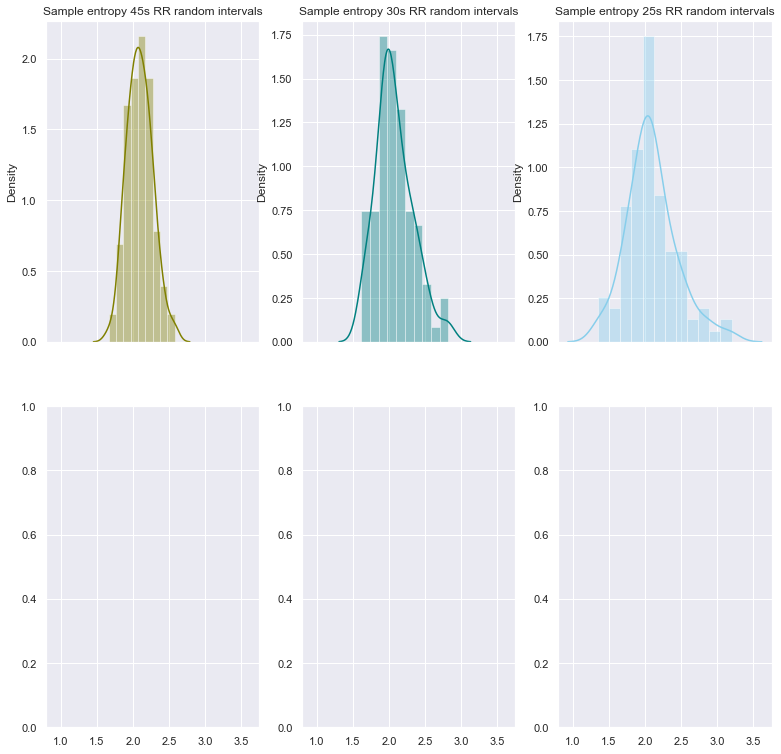

In [21]:
# Histograms der sample entropies generiert aus den random Zeitintervals(Sekundenweise)
sns.set_theme()
f, axes = plt.subplots(2, 3, figsize=(13, 13), sharex=True)
sns.distplot(RR_45s_inter ,bins='auto', color="olive", ax=axes[0, 0]).set_title('Sample entropy 45s RR random intervals')
sns.distplot(RR_30s_inter ,bins='auto', color="teal", ax=axes[0, 1]).set_title('Sample entropy 30s RR random intervals')
sns.distplot(RR_25s_inter ,bins='auto', color="skyblue", ax=axes[0, 2]).set_title('Sample entropy 25s RR random intervals')
#sns.distplot(RR_20s_inter ,bins='auto', color="red", ax=axes[1, 0]).set_title('Sample entropy 20s RR random intervals')
#sns.distplot(RR_15s_inter ,bins='auto', color="gold", ax=axes[1, 1]).set_title('Sample entropy 15s RR random intervals')
#sns.distplot(RR_10s_inter ,bins='auto', color="black", ax=axes[1, 2]).set_title('Sample entropy 10s RR random intervals')
plt.show()
